In [129]:
import numpy as np
import matplotlib
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [169]:
FLOOR = [2,11,10,19,28,29,30,21,
         22,23,14,15,16,25,34,33,
         42,51,52,60,61,69,70,59,
         58,57,56,55,65,47,38]
DRAGONS = [46,48,50,64,66,68]
EXIT = [78]
START = [2]

BOARD_IDX = np.genfromtxt('board_builder/board_layout.csv', delimiter=',').flatten()

DRAGON_IMG = mpimg.imread('board_builder/dragon.png')
EXIT_IMG   = mpimg.imread('board_builder/exit.png')
GNOME_IMG  = mpimg.imread('board_builder/gnome.png')
FLOOR_IMG  = mpimg.imread('board_builder/floor.png')
ROCK_IMG   = mpimg.imread('board_builder/rock.png')

LEFT_IMG  = mpimg.imread('board_builder/left.png')
RIGHT_IMG = mpimg.imread('board_builder/right.png')
UP_IMG    = mpimg.imread('board_builder/up.png')
DOWN_IMG  = mpimg.imread('board_builder/down.png')

MOVE_TRANSLATION = {1:LEFT_IMG, 2: RIGHT_IMG, 3: UP_IMG, 4:DOWN_IMG}

In [170]:
def init_board():
    # fill in board images
    board = [ROCK_IMG]
    for i in range(1,82):
        if i in DRAGONS:
            board.append(DRAGON_IMG)
        elif i in EXIT:
            board.append(EXIT_IMG)
        elif i in START:
            board.append(GNOME_IMG)
        elif i in FLOOR:
            board.append(FLOOR_IMG)
        else:
            board.append(ROCK_IMG)
    return board

In [172]:
def draw_board(board):
    plt.figure(figsize = (9,9))
    gs1 = gridspec.GridSpec(9, 9)
    gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes.
    for i in range(81):
        ax1 = plt.subplot(gs1[translate_idx(i)])
        plt.axis('on')
        ax1.imshow(board[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
    plt.show()

In [173]:
def translate_idx(idx):
    # Align 2d index with 1d index.
    return np.where(BOARD_IDX ==idx)[0][0]

def build_results(results):
    results = results.transpose().flatten()
    # fill in board images
    board = [ROCK_IMG]
    for i in range(1,82):
        if i in DRAGONS:
            board.append(DRAGON_IMG)
        elif i in EXIT:
            board.append(EXIT_IMG)
        elif i in FLOOR:
            board.append(MOVE_TRANSLATION[results[i]])
        else:
            board.append(ROCK_IMG)
    return board

def board_in_play(gnome):
    # fill in board images
    board = [ROCK_IMG]
    for i in range(1,82):
        if i in DRAGONS:
            board.append(DRAGON_IMG)
        elif i in EXIT:
            board.append(EXIT_IMG)
        elif i == gnome-1:
            board.append(GNOME_IMG)
        elif i in FLOOR:
            board.append(FLOOR_IMG)
        else:
            board.append(ROCK_IMG)
    return board

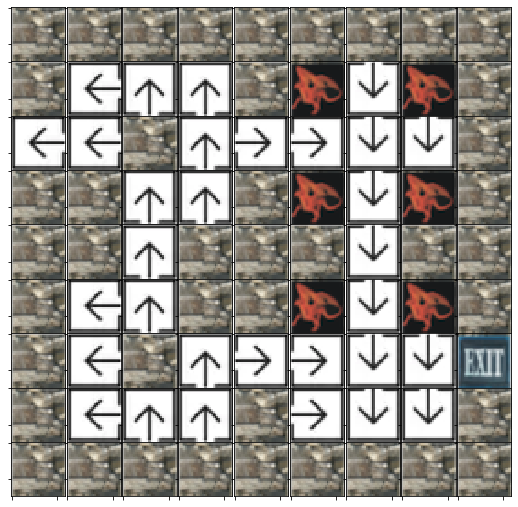

In [168]:
#board = board_in_play(11)
#board = init_board()
results1 = np.genfromtxt('dummy_results.csv', delimiter=',')
board = build_results(results1)
draw_board(board)